<a href="https://colab.research.google.com/github/sidikmp/KLASIFIKASI_SENTIMEN_ULASAN_PENGGUNA_APLIKASI_SHOPEE_DENGAN_ALGORITMA_NAIVE_BAYES_DAN_ID3/blob/main/KLASIFIKASI_SENTIMEN_ULASAN_PENGGUNA_APLIKASI_SHOPEE_DENGAN_ALGORITMA_NA%C3%8FVE_BAYES_DAN_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*IMPORT LIBRARY*

In [ ]:
!pip install Sastrawi

# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopwords bahasa Indonesia
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

# Load dan tampilkan dataset
df = pd.read_excel('Shopee_Sampled_Reviews.xlsx')
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user     2500 non-null   object        
 1   ulasan   2500 non-null   object        
 2   rating   2500 non-null   int64         
 3   tanggal  2500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 78.3+ KB


,user,ulasan,rating,tanggal
0,Andi Gunawan,Udah sering belanja trs tapi setiap pengajuan ...,1,2022-12-05 13:29:47
1,Sari Sari,Semenjak di upgrade.. SHOPEE JADI LEMOT,1,2022-12-27 05:36:57
2,Laz Ai,Penyelesaian masalah sangat buruk,1,2022-08-15 07:00:00
3,Kuprit Bae,Apk engga😇 jls,1,2023-03-16 04:05:30
4,Evans irdas,Lelet stress. Udah update terbaru tetap aja lemot,1,2022-12-22 17:34:33


#*PREPROCESSING DATA*

PROSES CLEANING

In [ ]:
import re
import string
import pandas as pd

# Fungsi cleaning
def clean_text(text):
    if text and isinstance(text, str):
        # Hapus URL
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # Hapus HTML
        text = re.sub(r'<.*?>', '', text)
        # Hapus emoji
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+", flags=re.UNICODE)
        text = emoji_pattern.sub('', text)
        # Hapus simbol
        text = re.sub(r'[' + re.escape(string.punctuation) + ']+', ' ', text)
        # Hapus angka
        text = re.sub(r'\d+', '', text)
        # Hapus spasi berlebih
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ''

# Terapkan fungsi cleaning ke kolom 'Ulasan'
df['cleaning'] = df['ulasan'].apply(clean_text)

# Tampilkan hasil
df_cleaned = df[['tanggal', 'user', 'rating', 'ulasan', 'cleaning']]
df_cleaned.head(10)


,tanggal,user,rating,ulasan,cleaning
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot
5,2023-01-01 11:07:14,Surnayim,1,Fitur lengkap tapi apk berat,Fitur lengkap tapi apk berat
6,2022-10-04 04:03:50,Oppo Sanggaukota,1,Shopee express jasa pengiriman lelet sekali.ny...,Shopee express jasa pengiriman lelet sekali ny...
7,2022-09-10 11:04:19,Suhendra Yandi,1,"Bintang satu aja,,,, karena paylater ku d mati...",Bintang satu aja karena paylater ku d matikan ...
8,2022-11-16 00:44:42,ZRIFF,1,Ga Kya dlu ada akun ff nya,Ga Kya dlu ada akun ff nya
9,2023-03-13 15:22:10,Herlini Raiiz,1,Aplikasi lemot,Aplikasi lemot


PROSES CASE FOLDING

In [ ]:
# Fungsi Case Folding: ubah teks menjadi huruf kecil
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

# Terapkan case folding pada kolom 'cleaning'
df['case_folding'] = df['cleaning'].apply(case_folding)

# Buat DataFrame dengan kolom yang relevan
df_cleaned = df[['tanggal', 'user', 'rating', 'ulasan', 'cleaning', 'case_folding']]
df_cleaned.head(10)


,tanggal,user,rating,ulasan,cleaning,case_folding
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot
5,2023-01-01 11:07:14,Surnayim,1,Fitur lengkap tapi apk berat,Fitur lengkap tapi apk berat,fitur lengkap tapi apk berat
6,2022-10-04 04:03:50,Oppo Sanggaukota,1,Shopee express jasa pengiriman lelet sekali.ny...,Shopee express jasa pengiriman lelet sekali ny...,shopee express jasa pengiriman lelet sekali ny...
7,2022-09-10 11:04:19,Suhendra Yandi,1,"Bintang satu aja,,,, karena paylater ku d mati...",Bintang satu aja karena paylater ku d matikan ...,bintang satu aja karena paylater ku d matikan ...
8,2022-11-16 00:44:42,ZRIFF,1,Ga Kya dlu ada akun ff nya,Ga Kya dlu ada akun ff nya,ga kya dlu ada akun ff nya
9,2023-03-13 15:22:10,Herlini Raiiz,1,Aplikasi lemot,Aplikasi lemot,aplikasi lemot


PROSES NORMALISASI

In [ ]:
def remove_repeated_characters(text):
    # Mengganti huruf berulang menjadi 1 huruf saja
    return re.sub(r'(.)\1{1,}', r'\1', text)


In [ ]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []

        for word in words:
            if word in kamus_tidak_baku:
                replaced_words.append(kamus_tidak_baku[word])
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''

    return replaced_text


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan penghapusan huruf berulang + normalisasi kamus
df['normalisasi'] = df['case_folding'].apply(lambda x:
    " ".join([kamus_tidak_baku.get(k, k) for k in remove_repeated_characters(x).split()])
)

# Tampilkan DataFrame dengan kolom yang diinginkan
df = df[['tanggal', 'user', 'rating', 'ulasan', 'cleaning', 'case_folding', 'normalisasi']]

# Lihat hasilnya
df.head(20)


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...
5,2023-01-01 11:07:14,Surnayim,1,Fitur lengkap tapi apk berat,Fitur lengkap tapi apk berat,fitur lengkap tapi apk berat,fitur lengkap tapi aplikasi berat
6,2022-10-04 04:03:50,Oppo Sanggaukota,1,Shopee express jasa pengiriman lelet sekali.ny...,Shopee express jasa pengiriman lelet sekali ny...,shopee express jasa pengiriman lelet sekali ny...,shopee expres jasa pengiriman lelet sekali men...
7,2022-09-10 11:04:19,Suhendra Yandi,1,"Bintang satu aja,,,, karena paylater ku d mati...",Bintang satu aja karena paylater ku d matikan ...,bintang satu aja karena paylater ku d matikan ...,bintang satu saja karena paylater ku di matika...
8,2022-11-16 00:44:42,ZRIFF,1,Ga Kya dlu ada akun ff nya,Ga Kya dlu ada akun ff nya,ga kya dlu ada akun ff nya,tidak kaya dulu ada akun f ya
9,2023-03-13 15:22:10,Herlini Raiiz,1,Aplikasi lemot,Aplikasi lemot,aplikasi lemot,aplikasi lambat


PROSES TOKENIZING

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...,"[sudah, sering, belanja, terus, tapi, setiap, ..."
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat,"[semenjak, di, upgrade, shopee, jadi, lambat]"
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,"[penyelesaian, masalah, sangat, buruk]"
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas,"[aplikasi, tidak, jelas]"
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...,"[lelet, stres, sudah, update, terbaru, tetap, ..."


PROSES STOPWORD REMOVAL

In [ ]:
import nltk
from nltk.corpus import stopwords

# Unduh stopwords Bahasa Indonesia
nltk.download('stopwords')

# Ambil stopwords dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopwords tambahan berdasarkan analisis
stopwords_tambahan = {
    'ya', 'tidak', 'di', 'yang', 'saya', 'sudah', 'dan', 'ada', 'saja',
    'ini', 'tapi', 'sekarang', 'mau', 'lagi', 'jadi', 'terus', 'padahal',
    'ke', 'kalau', 'dulu', 'juga', 'sama', 'kok', 'untuk', 'sih',
    'lebih', 'dari', 'sampai'
}

# Gabungkan stopwords
stop_words.update(stopwords_tambahan)

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Terapkan stopword removal
df['stopword removal'] = df['tokenize'].apply(remove_stopwords)

# Lihat hasil
df.head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...,"[sudah, sering, belanja, terus, tapi, setiap, ...","[belanja, pengajuan, lolos, malas, belanja, un..."
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat,"[semenjak, di, upgrade, shopee, jadi, lambat]","[semenjak, upgrade, shopee, lambat]"
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,"[penyelesaian, masalah, sangat, buruk]","[penyelesaian, buruk]"
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas,"[aplikasi, tidak, jelas]",[aplikasi]
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...,"[lelet, stres, sudah, update, terbaru, tetap, ...","[lelet, stres, update, terbaru, lambat]"


PROSES STEMMING

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text_list):
    # Stem setiap kata dalam list
    return [stemmer.stem(word) for word in text_list]

# Stemming dan gabungkan kembali jadi teks
df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...,"[sudah, sering, belanja, terus, tapi, setiap, ...","[belanja, pengajuan, lolos, malas, belanja, un...",belanja aju lolos malas belanja uninstal
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat,"[semenjak, di, upgrade, shopee, jadi, lambat]","[semenjak, upgrade, shopee, lambat]",semenjak upgrade shopee lambat
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,"[penyelesaian, masalah, sangat, buruk]","[penyelesaian, buruk]",selesai buruk
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas,"[aplikasi, tidak, jelas]",[aplikasi],aplikasi
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...,"[lelet, stres, sudah, update, terbaru, tetap, ...","[lelet, stres, update, terbaru, lambat]",lelet stres update baru lambat


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           2500 non-null   datetime64[ns]
 1   user              2500 non-null   object        
 2   rating            2500 non-null   int64         
 3   ulasan            2500 non-null   object        
 4   cleaning          2500 non-null   object        
 5   case_folding      2500 non-null   object        
 6   normalisasi       2500 non-null   object        
 7   tokenize          2500 non-null   object        
 8   stopword removal  2500 non-null   object        
 9   stemming          2500 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 195.4+ KB


EXPORT HASIL PREPROCESSING

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

#*LABELLING DATA RATING BASED*

In [ ]:
import pandas as pd

df = pd.read_csv("Hasil_Preprocessing_Data.csv")
df.head()


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...,"['sudah', 'sering', 'belanja', 'terus', 'tapi'...","['belanja', 'pengajuan', 'lolos', 'malas', 'be...",belanja aju lolos malas belanja uninstal
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat,"['semenjak', 'di', 'upgrade', 'shopee', 'jadi'...","['semenjak', 'upgrade', 'shopee', 'lambat']",semenjak upgrade shopee lambat
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,"['penyelesaian', 'masalah', 'sangat', 'buruk']","['penyelesaian', 'buruk']",selesai buruk
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas,"['aplikasi', 'tidak', 'jelas']",['aplikasi'],aplikasi
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...,"['lelet', 'stres', 'sudah', 'update', 'terbaru...","['lelet', 'stres', 'update', 'terbaru', 'lambat']",lelet stres update baru lambat


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2500 non-null   object
 1   user              2500 non-null   object
 2   rating            2500 non-null   int64 
 3   ulasan            2500 non-null   object
 4   cleaning          2484 non-null   object
 5   case_folding      2484 non-null   object
 6   normalisasi       2484 non-null   object
 7   tokenize          2500 non-null   object
 8   stopword removal  2500 non-null   object
 9   stemming          2445 non-null   object
dtypes: int64(1), object(9)
memory usage: 195.4+ KB


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')


In [ ]:
# Mengecek jumlah data kosong (null) di setiap kolom
print(df.isnull().sum())


tanggal              0
user                 0
rating               0
ulasan               0
cleaning            16
case_folding        16
normalisasi         16
tokenize             0
stopword removal     0
stemming            55
dtype: int64


In [ ]:
df = df.dropna()


In [ ]:
# Mengecek kembali jumlah data kosong (null) di setiap kolom
print(df.isnull().sum())


tanggal             0
user                0
rating              0
ulasan              0
cleaning            0
case_folding        0
normalisasi         0
tokenize            0
stopword removal    0
stemming            0
dtype: int64


In [ ]:
df_str = df.applymap(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Lalu deteksi duplikat
print("Jumlah data duplikat:", df_str.duplicated().sum())
df_str[df_str.duplicated()]


Jumlah data duplikat: 0


/tmp/ipython-input-28753205.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_str = df.applymap(lambda x: ' '.join(x) if isinstance(x, list) else x)


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2445 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           2445 non-null   datetime64[ns]
 1   user              2445 non-null   object        
 2   rating            2445 non-null   int64         
 3   ulasan            2445 non-null   object        
 4   cleaning          2445 non-null   object        
 5   case_folding      2445 non-null   object        
 6   normalisasi       2445 non-null   object        
 7   tokenize          2445 non-null   object        
 8   stopword removal  2445 non-null   object        
 9   stemming          2445 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 210.1+ KB


In [ ]:
def label_sentimen(rating):
    if rating > 3:
        return 1  # Positif
    elif rating < 3:
        return 0  # Negatif
    else:
        return None  # Netral atau diabaikan

df['label'] = df['rating'].apply(label_sentimen)
df = df.dropna(subset=['label'])  # Menghapus baris dengan label None
df['label'] = df['label'].astype(int)  # Konversi dari float ke integer


/tmp/ipython-input-1286994778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)  # Konversi dari float ke integer


In [ ]:
# Menampilkan 10 sampel acak dari kolom Tanggal, User, Rating, Ulasan dan label
df[['tanggal', 'user', 'rating', 'ulasan','cleaning', 'case_folding', 'normalisasi', 'tokenize', 'stopword removal', 'stemming', 'label']].sample(10)


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming,label
57,2022-10-15 11:10:38,Cacl Back,1,Voucher gratis ongkir min belanja 0 gak bisa d...,Voucher gratis ongkir min belanja gak bisa di ...,voucher gratis ongkir min belanja gak bisa di ...,voucher gratis ongkir min belanja tidak bisa d...,"['voucher', 'gratis', 'ongkir', 'min', 'belanj...","['voucher', 'gratis', 'ongkir', 'min', 'belanj...",voucher gratis ongkir min belanja pakai tolong...,0
1685,2022-09-07 16:54:46,Pujita Mutiara,4,"Sangat, Banget membantu keperluan dan kebutuha...",Sangat Banget membantu keperluan dan kebutuhan...,sangat banget membantu keperluan dan kebutuhan...,sangat banget membantu keperluan dan kebutuhan...,"['sangat', 'banget', 'membantu', 'keperluan', ...","['banget', 'membantu', 'keperluan', 'kebutuhan...",banget bantu perlu butuh semant shopeteam muda...,1
2432,2022-08-14 18:36:15,Lola Dwi Ayu,5,Tolong,Tolong,tolong,tolong,['tolong'],['tolong'],tolong,1
1662,2022-08-05 05:35:13,JUNAEDI TAMRIN,4,Memuaskan,Memuaskan,memuaskan,memuaskan,['memuaskan'],['memuaskan'],muas,1
721,2022-09-23 14:00:36,Umar Riduan,2,Mohon segera di perbaiki masalah lambatnya res...,Mohon segera di perbaiki masalah lambatnya res...,mohon segera di perbaiki masalah lambatnya res...,mohon segera di perbaiki masalah lambatnya res...,"['mohon', 'segera', 'di', 'perbaiki', 'masalah...","['mohon', 'perbaiki', 'lambatnya', 'respon', '...",mohon baik lambat respon aplikasi shopee versi...,0
2119,2022-08-13 23:49:51,Taufik Bahri,5,"Aplikasi belanja yg sangat membantu, banyak di...",Aplikasi belanja yg sangat membantu banyak dis...,aplikasi belanja yg sangat membantu banyak dis...,aplikasi belanja yang sangat membantu banyak d...,"['aplikasi', 'belanja', 'yang', 'sangat', 'mem...","['aplikasi', 'belanja', 'membantu', 'diskon', ...",aplikasi belanja bantu diskon gratis ongkirnya,1
1547,2022-08-23 08:08:33,Abdillah Abdillah,4,"RX Rp hu5,6254332",RX Rp hu,rx rp hu,rx rp hu,"['rx', 'rp', 'hu']","['rx', 'rp', 'hu']",rx rp hu,1
2367,2022-09-05 09:07:05,Emilia Hafisah,5,Bagus,Bagus,bagus,bagus,['bagus'],['bagus'],bagus,1
47,2022-11-02 13:43:00,Powell Tobing,1,Lemot parah,Lemot parah,lemot parah,lambat parah,"['lambat', 'parah']","['lambat', 'parah']",lambat parah,0
2411,2022-10-12 14:36:55,Ciprut Boroz25,5,. Saya sangat puas dgn aplikas google play😇,Saya sangat puas dgn aplikas google play,saya sangat puas dgn aplikas google play,saya sangat puas dengan aplikas gogle play,"['saya', 'sangat', 'puas', 'dengan', 'aplikas'...","['puas', 'aplikas', 'gogle', 'play']",puas aplikas gogle play,1


/tmp/ipython-input-3857514541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_texts, y=sentiment_count.values, palette='pastel')


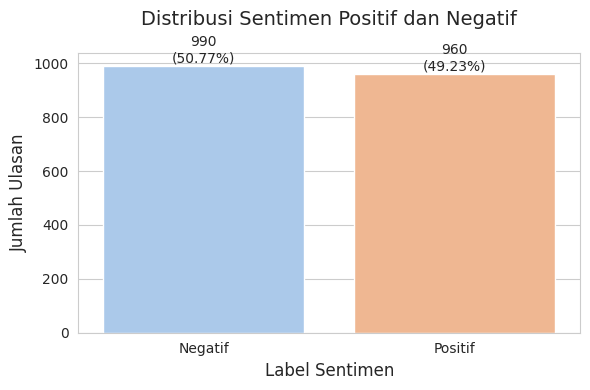

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah setiap kelas sentimen dari kolom 'label'
sentiment_count = df['label'].value_counts().sort_index()  # urutkan dari 0 ke 1
total = len(df['label'])  # Total jumlah data

# Mapping label numerik ke teks untuk tampilan
label_names = {0: 'Negatif', 1: 'Positif'}
label_texts = [label_names[i] for i in sentiment_count.index]

# Set tema visual
sns.set_style('whitegrid')

# Buat plot batang
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=label_texts, y=sentiment_count.values, palette='pastel')

# Judul dan label sumbu
plt.title('Distribusi Sentimen Positif dan Negatif', fontsize=14, pad=20)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

# Tambahkan jumlah dan persentase di atas setiap batang
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 2, f'{count}\n({percentage})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           1950 non-null   datetime64[ns]
 1   user              1950 non-null   object        
 2   rating            1950 non-null   int64         
 3   ulasan            1950 non-null   object        
 4   cleaning          1950 non-null   object        
 5   case_folding      1950 non-null   object        
 6   normalisasi       1950 non-null   object        
 7   tokenize          1950 non-null   object        
 8   stopword removal  1950 non-null   object        
 9   stemming          1950 non-null   object        
 10  label             1950 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 182.8+ KB


EXPORT HASIL LABELLING

In [ ]:
df.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False);

#*MODEL ALGORTIMA NAIVE BAYES DAN ID3*

In [ ]:
import pandas as pd

df = pd.read_csv("Hasil_Labelling_Data.csv")
df.head()


,tanggal,user,rating,ulasan,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming,label
0,2022-12-05 13:29:47,Andi Gunawan,1,Udah sering belanja trs tapi setiap pengajuan ...,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...,sudah sering belanja terus tapi setiap pengaju...,"['sudah', 'sering', 'belanja', 'terus', 'tapi'...","['belanja', 'pengajuan', 'lolos', 'malas', 'be...",belanja aju lolos malas belanja uninstal,0
1,2022-12-27 05:36:57,Sari Sari,1,Semenjak di upgrade.. SHOPEE JADI LEMOT,Semenjak di upgrade SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot,semenjak di upgrade shopee jadi lambat,"['semenjak', 'di', 'upgrade', 'shopee', 'jadi'...","['semenjak', 'upgrade', 'shopee', 'lambat']",semenjak upgrade shopee lambat,0
2,2022-08-15 07:00:00,Laz Ai,1,Penyelesaian masalah sangat buruk,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk,"['penyelesaian', 'masalah', 'sangat', 'buruk']","['penyelesaian', 'buruk']",selesai buruk,0
3,2023-03-16 04:05:30,Kuprit Bae,1,Apk engga😇 jls,Apk engga jls,apk engga jls,aplikasi tidak jelas,"['aplikasi', 'tidak', 'jelas']",['aplikasi'],aplikasi,0
4,2022-12-22 17:34:33,Evans irdas,1,Lelet stress. Udah update terbaru tetap aja lemot,Lelet stress Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot,lelet stres sudah update terbaru tetap saja la...,"['lelet', 'stres', 'sudah', 'update', 'terbaru...","['lelet', 'stres', 'update', 'terbaru', 'lambat']",lelet stres update baru lambat,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           1950 non-null   object
 1   user              1950 non-null   object
 2   rating            1950 non-null   int64 
 3   ulasan            1950 non-null   object
 4   cleaning          1950 non-null   object
 5   case_folding      1950 non-null   object
 6   normalisasi       1950 non-null   object
 7   tokenize          1950 non-null   object
 8   stopword removal  1950 non-null   object
 9   stemming          1950 non-null   object
 10  label             1950 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 167.7+ KB


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Pastikan kolom 'stemming' bertipe string
df['stemming'] = df['stemming'].astype(str)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),     # unigram dan bigram
    max_features=5000,      # maksimum fitur
    sublinear_tf=True       # skala sublinear untuk TF
)

# Buat matriks TF-IDF dari kolom 'stemming'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemming'])

# Ambil fitur/term
features = tfidf_vectorizer.get_feature_names_out()

# Hitung rata-rata TF-IDF untuk setiap term
average_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)

# Buat DataFrame untuk hasil akhir
df_tfidf = pd.DataFrame({
    'Term': features,
    'Average TF-IDF': average_tfidf
})

# Urutkan berdasarkan nilai tertinggi
df_tfidf = df_tfidf.sort_values(by='Average TF-IDF', ascending=False).reset_index(drop=True)
df_tfidf['Rank'] = df_tfidf.index + 1

# Tampilkan 10 term teratas
print(df_tfidf.head(10))


       Term  Average TF-IDF  Rank
0     bagus        0.048627     1
1    shopee        0.040500     2
2    lambat        0.037534     3
3  aplikasi        0.032372     4
4    mantap        0.027159     5
5        ok        0.022736     6
6    banget        0.021419     7
7   belanja        0.016261     8
8     bantu        0.014971     9
9      baik        0.014185    10


In [ ]:
# Ubah TF-IDF menjadi X (fitur numerik)
X = tfidf_matrix
y = df['label']  # Pastikan kolom label 0/1 sudah ada


In [ ]:
df.shape

(1950, 11)

SPLIT DATA

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Daftar skenario split (train:test)
split_ratios = [(0.8, 0.2)]

# Dictionary kosong untuk hasil split
split_data = {}


In [ ]:
# Lakukan split untuk setiap rasio dan simpan jumlah data latih dan uji
for train_ratio, test_ratio in split_ratios:
    # Split data (pastikan X dan y sudah didefinisikan sebelumnya)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, test_size=test_ratio, random_state=42
    )

    # Simpan jumlah data hasil split
    key = f"{int(train_ratio*100)}:{int(test_ratio*100)}"
    split_data[key] = {
        'train': X_train.shape[0],
        'test': X_test.shape[0]
    }

# Cek isi dictionary
print(split_data)


{'80:20': {'train': 1560, 'test': 390}}


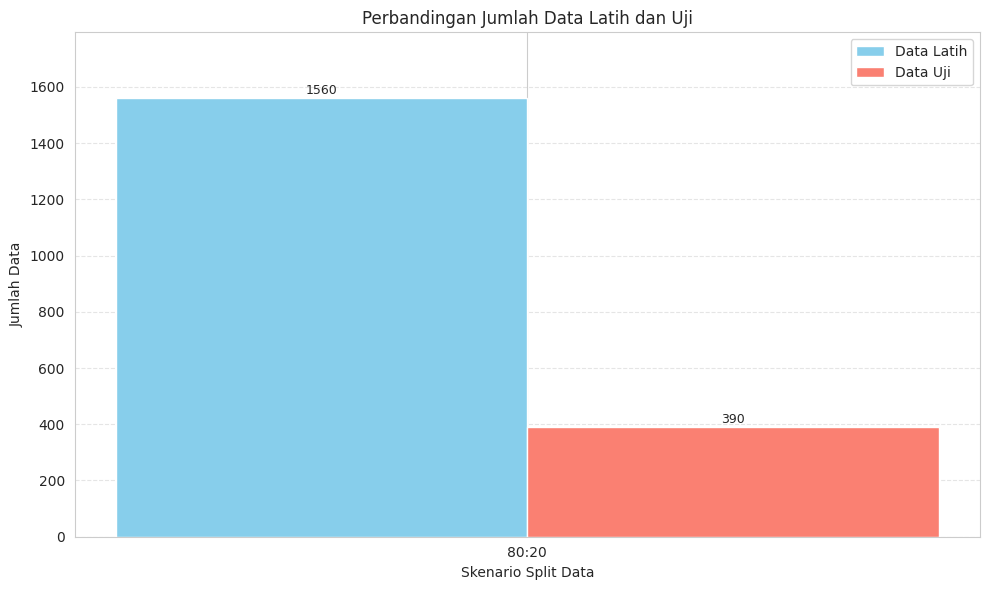

In [ ]:
# Label sumbu X
skenarios = list(split_data.keys())

# Data latih dan uji
data_latih = [split_data[s]['train'] for s in skenarios]
data_uji = [split_data[s]['test'] for s in skenarios]

# Posisi batang
x = np.arange(len(skenarios))
width = 0.35

# Plot diagram batang
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, data_latih, width, label='Data Latih', color='skyblue')
bar2 = plt.bar(x + width/2, data_uji, width, label='Data Uji', color='salmon')

# Tambahkan nilai di atas batang
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel('Skenario Split Data')
plt.ylabel('Jumlah Data')
plt.title('Perbandingan Jumlah Data Latih dan Uji')
plt.xticks(x, skenarios)
plt.ylim(0, max(data_latih + data_uji) * 1.15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


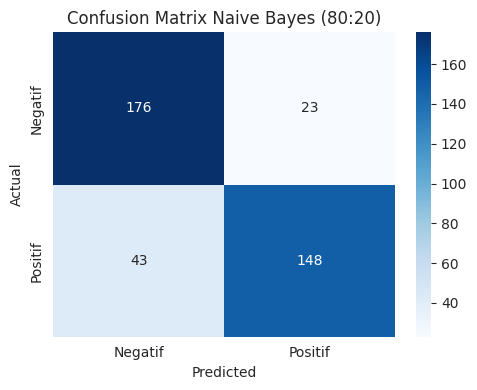

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

== Naive Bayes (80:20) ===
Accuracy: 0.8307692307692308
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.80      0.88      0.84       199
     Positif       0.87      0.77      0.82       191

    accuracy                           0.83       390
   macro avg       0.83      0.83      0.83       390
weighted avg       0.83      0.83      0.83       390





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import files
import os

# Daftar skenario split data
split_ratios = [(0.8, 0.2)]

# Loop untuk setiap skenario
for train_ratio, test_ratio in split_ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, test_size=test_ratio, random_state=42
    )

    # Inisialisasi dan latih model Naive Bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)

    # Prediksi
    y_pred = nb_classifier.predict(X_test)

    # Evaluasi
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=["Negatif", "Positif"])

    # Format nama skenario
    split_name = f"{int(train_ratio * 100)}:{int(test_ratio * 100)}"
    filename = f'conf_matrix_nb_{split_name.replace(":", "_")}.png'

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negatif", "Positif"],
                yticklabels=["Negatif", "Positif"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix Naive Bayes ({split_name})')
    plt.tight_layout()

    # Simpan dan tampilkan gambar
    plt.savefig(filename)
    plt.show()

    # Unduh file dari Colab
    if os.path.exists(filename):
        files.download(filename)

    # Tampilkan hasil evaluasi setelah visualisasi
    print(f"== Naive Bayes ({split_name}) ===")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("\n" + "="*50 + "\n")


In [ ]:
precision = 0.8654970760233
precision_rounded = round(precision, 2)  # dibulatkan ke 2 angka di belakang koma
print(precision_rounded)  # Output: 0.87


0.87


In [ ]:
f1_manual = 0.8175445013411
f1_rounded = round(f1_manual, 2)
print(f1_rounded)  # Output: 0.82


0.82


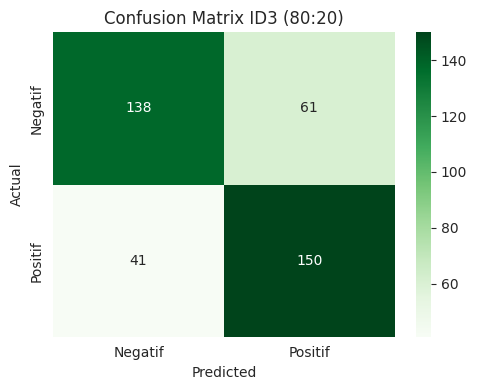

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

== ID3 (80:20) ===
Accuracy: 0.7384615384615385
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.77      0.69      0.73       199
     Positif       0.71      0.79      0.75       191

    accuracy                           0.74       390
   macro avg       0.74      0.74      0.74       390
weighted avg       0.74      0.74      0.74       390





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import files
import os

# Daftar skenario split data
split_ratios = [(0.8, 0.2)]

# Loop untuk setiap skenario
for train_ratio, test_ratio in split_ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, test_size=test_ratio, random_state=42
    )

    # Inisialisasi dan latih model ID3 (Decision Tree dengan entropy)
    id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    id3_classifier.fit(X_train, y_train)

    # Prediksi
    y_pred = id3_classifier.predict(X_test)

    # Evaluasi
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=["Negatif", "Positif"])

    # Format nama skenario
    split_name = f"{int(train_ratio * 100)}:{int(test_ratio * 100)}"
    filename = f'conf_matrix_id3_{split_name.replace(":", "_")}.png'

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens',
                xticklabels=["Negatif", "Positif"],
                yticklabels=["Negatif", "Positif"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ID3 ({split_name})')
    plt.tight_layout()

    # Simpan dan tampilkan gambar
    plt.savefig(filename)
    plt.show()

    # Unduh file dari Colab
    if os.path.exists(filename):
        files.download(filename)

    # Tampilkan hasil evaluasi setelah visualisasi
    print(f"== ID3 ({split_name}) ===")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("\n" + "="*50 + "\n")


In [ ]:
# Definisikan nilai recall manual
recall_manual = 0.7853403141361

# lakukan pembulatan
recall_2digit = round(recall_manual, 2)
print("Recall dibulatkan 2 desimal:", recall_2digit)


Recall dibulatkan 2 desimal: 0.79
